In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import datetime
import seaborn as sns

sns.set()

C:\Users\new--laptop\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
model= pd.read_csv("flight_delay.csv")

In [3]:
#to be able to call the feature throught model.NAME or df.FEATURE
model.columns = [c.replace(' ', '_') for c in model.columns]

1436.0


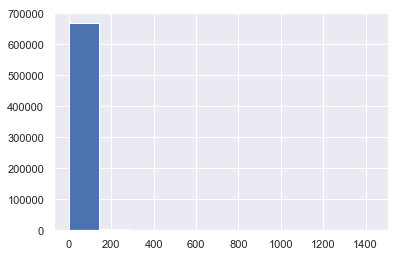

In [4]:
# simple way to detect and remove outliers
ma=max(model['Delay'])
print(ma)
plt.hist(model['Delay'].values)
plt.show
model = model[model['Delay'] < 200]

In [5]:
#labeling airports
le = preprocessing.LabelEncoder()
model.dtypes
model["Destination_Airport"]=le.fit_transform(model["Destination_Airport"])
model["Depature_Airport"]=le.fit_transform(model["Depature_Airport"])

model.dtypes


Depature_Airport             int64
Scheduled_depature_time     object
Destination_Airport          int64
Scheduled_arrival_time      object
Delay                      float64
dtype: object

In [6]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670593 entries, 0 to 675511
Data columns (total 5 columns):
Depature_Airport           670593 non-null int64
Scheduled_depature_time    670593 non-null object
Destination_Airport        670593 non-null int64
Scheduled_arrival_time     670593 non-null object
Delay                      670593 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 30.7+ MB


model[Scheduled_depature_time] = pd.to_datetime(model.Scheduled_depature_time, unit='s')

In [7]:
date_format = "%y-%m-%d %H:%M:%S"
model['Scheduled_depature_time'] = pd.to_datetime(model.Scheduled_depature_time)
model['Scheduled_arrival_time'] = pd.to_datetime(model.Scheduled_arrival_time)
model.info()


model["Scheduled_depature_hour"] = pd.to_datetime(model.Scheduled_depature_time,format=date_format).dt.hour
model["Scheduled_depature_year"] = pd.to_datetime(model.Scheduled_depature_time,format=date_format).dt.year

model["Scheduled_arrival_year"] = pd.to_datetime(model.Scheduled_arrival_time,format=date_format).dt.year
model["Scheduled_depature_month"] = pd.to_datetime(model.Scheduled_depature_time,format=date_format).dt.month
model["Scheduled_depature_dayofweek"] = pd.to_datetime(model.Scheduled_depature_time,format=date_format).dt.dayofweek
model["Scheduled_depature_weekofyear"] = pd.to_datetime(model.Scheduled_depature_time,format=date_format).dt.weekofyear


model["Scheduled_depature_minute"] = pd.to_datetime(model.Scheduled_depature_time,format="%d/%m/%Y %h/%m/%s").dt.minute  
#model["Scheduled_arrival_hour"] = pd.to_datetime(model.Scheduled_arrival_time,format="%d/%m/%Y %h/%m/%s").dt.hour  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670593 entries, 0 to 675511
Data columns (total 5 columns):
Depature_Airport           670593 non-null int64
Scheduled_depature_time    670593 non-null datetime64[ns]
Destination_Airport        670593 non-null int64
Scheduled_arrival_time     670593 non-null datetime64[ns]
Delay                      670593 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 30.7 MB


In [8]:
model.head()

,Depature_Airport,Scheduled_depature_time,Destination_Airport,Scheduled_arrival_time,Delay,Scheduled_depature_hour,Scheduled_depature_year,Scheduled_arrival_year,Scheduled_depature_month,Scheduled_depature_dayofweek,Scheduled_depature_weekofyear,Scheduled_depature_minute
0,144,2015-10-27 07:40:00,56,2015-10-27 20:45:00,0.0,7,2015,2015,10,1,44,40
1,144,2015-10-27 09:50:00,68,2015-10-27 20:35:00,2.0,9,2015,2015,10,1,44,50
2,144,2015-10-27 10:45:00,94,2015-10-27 23:35:00,0.0,10,2015,2015,10,1,44,45
3,144,2015-10-27 12:30:00,82,2015-10-28 01:20:00,0.0,12,2015,2015,10,1,44,30
4,113,2015-10-27 14:15:00,143,2015-10-27 16:40:00,9.0,14,2015,2015,10,1,44,15


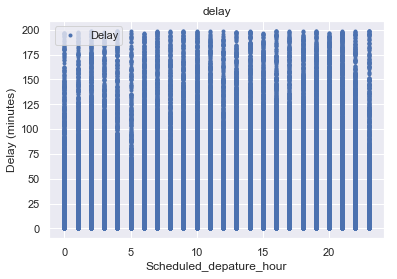

In [9]:
model.plot(x='Scheduled_depature_hour', y='Delay', style='.')
plt.title('delay')
plt.xlabel('Scheduled_depature_hour')
plt.ylabel('Delay (minutes)')
plt.show()

In [10]:
#claculating the Duration of filghts
Scheduled_depature_time=list(model.Scheduled_depature_time)
Scheduled_arrival_time=list(model.Scheduled_arrival_time)
Duration=[]
for i in range(len(Scheduled_depature_time)):
    a=Scheduled_depature_time[i]
    b=Scheduled_arrival_time[i]
    Duration.append(pd.Timedelta(b - a))

In [11]:
model['Duration']= Duration

In [12]:
model.head(4)

,Depature_Airport,Scheduled_depature_time,Destination_Airport,Scheduled_arrival_time,Delay,Scheduled_depature_hour,Scheduled_depature_year,Scheduled_arrival_year,Scheduled_depature_month,Scheduled_depature_dayofweek,Scheduled_depature_weekofyear,Scheduled_depature_minute,Duration
0,144,2015-10-27 07:40:00,56,2015-10-27 20:45:00,0.0,7,2015,2015,10,1,44,40,13:05:00
1,144,2015-10-27 09:50:00,68,2015-10-27 20:35:00,2.0,9,2015,2015,10,1,44,50,10:45:00
2,144,2015-10-27 10:45:00,94,2015-10-27 23:35:00,0.0,10,2015,2015,10,1,44,45,12:50:00
3,144,2015-10-27 12:30:00,82,2015-10-28 01:20:00,0.0,12,2015,2015,10,1,44,30,12:50:00


In [13]:
#splitting the dataset by the year
model_train = model[model['Scheduled_depature_year'] <= 2017]
model_test = model[model['Scheduled_depature_year'] > 2017 ]
#splitting the dataset in the year for one month only
model_month= model[( model['Scheduled_depature_month'] == 11 ) & (model['Scheduled_depature_year'] == 2015)]

C:\Users\new--laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\new--laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\new--laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

<Figure size 720x720 with 0 Axes>

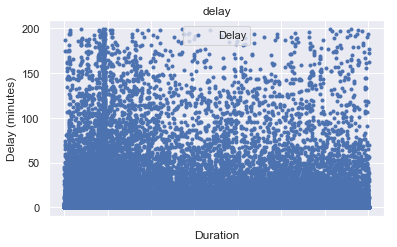

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16882 entries, 2440 to 19454
Data columns (total 14 columns):
Depature_Airport                 16882 non-null int64
Scheduled_depature_time          16882 non-null datetime64[ns]
Destination_Airport              16882 non-null int64
Scheduled_arrival_time           16882 non-null datetime64[ns]
Delay                            16882 non-null float64
Scheduled_depature_hour          16882 non-null int64
Scheduled_depature_year          16882 non-null int64
Scheduled_arrival_year           16882 non-null int64
Scheduled_depature_month         16882 non-null int64
Scheduled_depature_dayofweek     16882 non-null int64
Scheduled_depature_weekofyear    16882 non-null int64
Scheduled_depature_minute        16882 non-null int64
Duration                         16882 non-null timedelta64[ns]
Duration_mins                    16882 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(10), timedelta64[ns](1)
memory usage: 1.9 MB


In [14]:
#experimenting with model_month
format_duration=""
model_month.shape

model_month['Duration_mins']=(pd.to_datetime(model.Duration,format=format_duration).dt.hour)*60 + (pd.to_datetime(model.Duration,format=format_duration).dt.minute)  
model_train['Duration_mins']=(pd.to_datetime(model_train.Duration,format=format_duration).dt.hour)*60 + (pd.to_datetime(model_train.Duration,format=format_duration).dt.minute)
model_test['Duration_mins']=(pd.to_datetime(model_test.Duration,format=format_duration).dt.hour)*60 + (pd.to_datetime(model_test.Duration,format=format_duration).dt.minute)


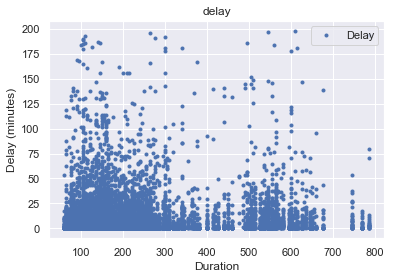

In [15]:
#plotting 
model_month.plot(x='Duration_mins', y='Delay', style='.')
plt.title('delay')
plt.xlabel('Duration')
plt.ylabel('Delay (minutes)')
plt.show()
#model_train.head()
#model_test.head()

C:\Users\new--laptop\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


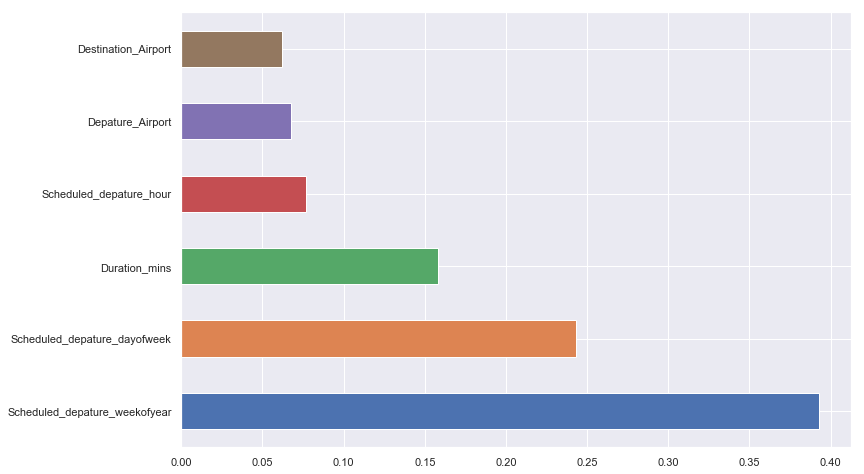

In [16]:
#testing what feature has the most affect on the Target (delay)
from sklearn.ensemble import ExtraTreesRegressor
X = model_train.loc[:, ['Duration_mins','Scheduled_depature_dayofweek','Scheduled_depature_hour','Depature_Airport','Destination_Airport','Scheduled_depature_weekofyear']]
X.head()

y=model_train.loc[:,'Delay']


selection = ExtraTreesRegressor()
selection.fit(X, y)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

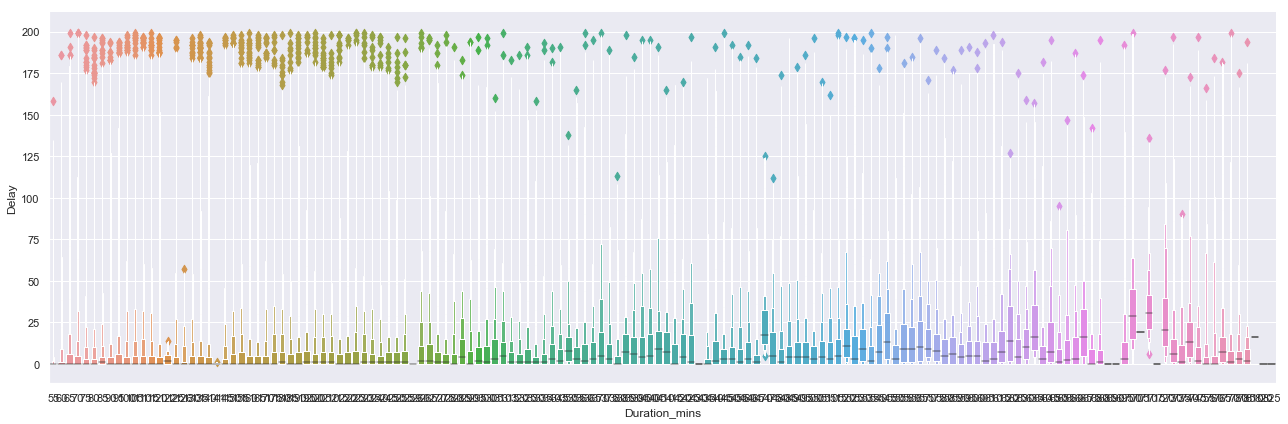

In [17]:
sns.catplot(y = "Delay", x = "Duration_mins", data = model_train.sort_values("Delay", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X, y)

X_test = model_test.loc[:, ['Duration_mins','Scheduled_depature_dayofweek','Scheduled_depature_hour','Depature_Airport','Destination_Airport','Scheduled_depature_weekofyear']]
X.head()

y_test=model_test.loc[:,'Delay']

In [19]:
y_pred = reg_rf.predict(X_test)

In [20]:
reg_rf.score(X, y)

0.5949319856829638

In [21]:
reg_rf.score(X_test, y_test)

-0.8244516088397889

C:\Users\new--laptop\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


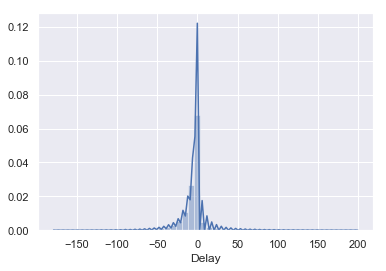

In [22]:
sns.distplot(y_test-y_pred)
plt.show()

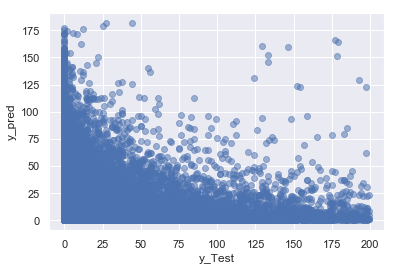

In [23]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_Test")
plt.ylabel("y_pred")
plt.show()

In [24]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



MAE: 10.700515067911658
MSE: 461.51461004437965
RMSE: 21.482891100696378


In [25]:
'''from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X,y)'''

"from sklearn.model_selection import RandomizedSearchCV\n#Randomized Search CV\n\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]\n# Number of features to consider at every split\nmax_features = ['auto']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(5, 30, num = 6)]\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10, 15, 100]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 5, 10]\n\n# Create the random grid\n\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf}\n\n# Random search of parameters, using 5 fold cross validation, \n# search across 100 different combinations\nrf_random = RandomizedSearchCV(estimator = reg_rf, param_distrib

In [26]:
'''''rf_random.best_params_
prediction = rf_random.predict(X_test)

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()'''

"''rf_random.best_params_\nprediction = rf_random.predict(X_test)\n\nplt.figure(figsize = (8,8))\nsns.distplot(y_test-prediction)\nplt.show()"

In [27]:
#from sklearn.preprocessing import MinMaxScaler


In [28]:
'''X_test = model_test.loc[:, ['Duration_mins']]
X.head()

y_test=model_test.loc[:,'Delay']
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
y_pred_log = clf.predict(X_test)

# caclulate metrics
print('Testing accuracy = {}'.format(metrics.accuracy_score(y, y_pred_log)))
print('Testing precision = {}'.format(metrics.precision_score(y, y_pred_log)))
print('Testing recall = {}'.format(metrics.recall_score(y, y_pred_log)))'''

"X_test = model_test.loc[:, ['Duration_mins']]\nX.head()\n\ny_test=model_test.loc[:,'Delay']\nfrom sklearn.linear_model import LogisticRegression\nclf = LogisticRegression(random_state=0).fit(X, y)\ny_pred_log = clf.predict(X_test)\n\n# caclulate metrics\nprint('Testing accuracy = {}'.format(metrics.accuracy_score(y, y_pred_log)))\nprint('Testing precision = {}'.format(metrics.precision_score(y, y_pred_log)))\nprint('Testing recall = {}'.format(metrics.recall_score(y, y_pred_log)))"

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model

In [30]:
#poly = PolynomialFeatures(degree=4)
#X_poly = poly.fit_transform(X)
#poly.fit(X_poly,y)
poly = PolynomialFeatures(degree=2)

df_train=pd.DataFrame()
df_test=pd.DataFrame()
y_train=pd.DataFrame()
y_test=pd.DataFrame()

df_train['Duration_mins'] = model_train['Duration_mins']
df_test['Duration_mins']= model_test['Duration_mins']
y_train = model_train.Delay.values
y_test = model_test.Delay.values

from sklearn.model_selection import cross_val_score


In [31]:
x_train_poly = poly.fit_transform(df_train)
x_test_poly = poly.fit_transform(df_test)

lin = linear_model.LinearRegression()

In [32]:
lin=lin.fit(x_train_poly, y_train)


In [33]:
co=lin.coef_
intercept = lin.intercept_

<function matplotlib.pyplot.show(*args, **kw)>

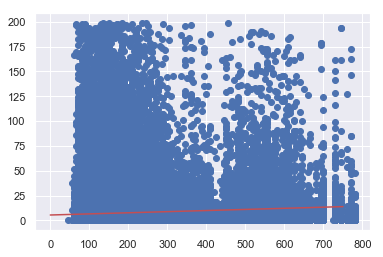

In [34]:
x_axis= np.arange(0,800,50)
res= intercept+co[1]*x_axis+co[2]*x_axis
plt.scatter(df_test,y_test)
plt.plot(x_axis,res,color='r')
plt.show

In [35]:
from sklearn.metrics import r2_score
prediction = lin.predict(x_test_poly)
r2_score(prediction, y_test)


-80.09937598653926

In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression.fit(df_train, y_train)
y_pred_log = clf.predict(df_test)

# caclulate metrics
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_pred_log)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_pred_log)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_pred_log)))

TypeError: fit() missing 1 required positional argument: 'y'